Neste notebook corre-se o modelo simples numa configuração inicial semelhate à da oposição de 2024-12-07. Os valores iniciais dos ângulos da Terra e de Io são, respetivamente 0 e -87,8099 (este valor foi obtido com o sistema Horizons da NASA). Pretende-se comparar os tempos das emergências e das ocultações calculados com o modelo com os simulados no stellarium.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dttm
import romer_utils as ru

Carregar a lista de emersões e ocultações do modelo

In [3]:
import model_errest as mde
em, oc = (mde.emerg, mde.occul)

In [4]:
mte=np.array([e[0] for e in em])
mto=np.array([e[0] for e in oc])

Tempos das ocultações e emersões no período sinódico de 2025 gerados pelo stellarium

In [5]:
file = open("../data/all_events.dat",'r')
text = file.read()
file.close()
lines = text.split('\n')
ti = dttm.datetime.fromisoformat(lines[932][4:])
te=[]
to=[]
for i,line in enumerate(lines[933:-1]):
    if line[0]=="E":
        timestr = line[4:23]
        time = dttm.datetime.fromisoformat(timestr)
        te.append(time)
    elif line[0]=='O':
        timestr = line[4:23]
        time = dttm.datetime.fromisoformat(timestr)
        to.append(time)
ste = np.array([(t-ti).total_seconds() for t in te])
sto = np.array([(t-ti).total_seconds() for t in to])

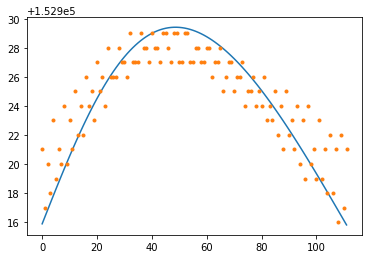

In [10]:
plt.plot(62+mte[1:]-mte[:-1],'-', ste[1:]-ste[:-1],'.');

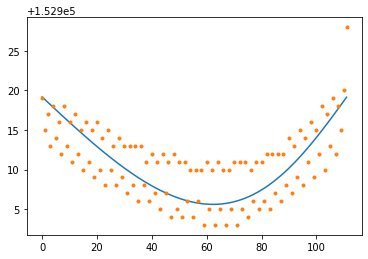

In [13]:
plt.plot(66+mto[1:]-mto[:-1],'-', sto[1:]-sto[:-1],'.');

In [36]:
ste[-4:]-ste[-5:-1]

array([152916., 152922., 152917., 152072.])

In [38]:
te[-2],te[-1]

(datetime.datetime(2025, 6, 22, 20, 11, 58),
 datetime.datetime(2025, 6, 24, 14, 26, 30))